In [1]:
import pickle as pk
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as dates

In [2]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_F.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptF = pd.DataFrame(botpt_data)
df_botptF['bottom_pressure'] = df_botptF['bottom_pressure'].astype(float)
df_botptF['depth']=df_botptF['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptF.index.to_pydatetime()]
df_botptF['epoch'] = epoch
df_botptF= df_botptF.sort_index()
df_botptF.index.name= 'Date'
del df_botptF['epoch']
del df_botptF['bottom_pressure']
df_botptF.tail()

,depth
Date,
2019-06-27 23:58:45,1510.264895
2019-06-27 23:59:00,1510.266367
2019-06-27 23:59:15,1510.267839
2019-06-27 23:59:30,1510.268494
2019-06-27 23:59:45,1510.269148


In [3]:
# df_botptF.loc['2018-02-17']

In [4]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_E.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptE = pd.DataFrame(botpt_data)
df_botptE['bottom_pressure'] = df_botptE['bottom_pressure'].astype(float)
df_botptE['depth']=df_botptE['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptE.index.to_pydatetime()]
df_botptE['epoch'] = epoch
df_botptE= df_botptE.sort_index()
df_botptE.index.name= 'Date'
del df_botptE['epoch']
del df_botptE['bottom_pressure']
df_botptE.head()

,depth
Date,
2017-01-01 00:00:00,1502.244033
2017-01-01 00:00:15,1502.242725
2017-01-01 00:00:30,1502.239944
2017-01-01 00:00:45,1502.237327
2017-01-01 00:01:00,1502.235200


#### Merge BOTPT E and BOTPT F 

In [5]:
test = pd.merge(df_botptF, df_botptE,how='outer', indicator=True, left_index=True, right_index=True, suffixes=('_F', '_E'))

In [6]:
df_botptMerge = test[test['_merge'] == 'both']
del df_botptMerge['_merge']

In [7]:
df_botptMerge = df_botptMerge.loc['2017-1-1 00:00:00':'2017-01-30 00:00:00']

In [8]:
df_botptMerge

,depth_F,depth_E
Date,,
2017-01-01 00:00:00,1511.468474,1502.244033
2017-01-01 00:00:15,1511.466184,1502.242725
2017-01-01 00:00:30,1511.464875,1502.239944
2017-01-01 00:00:45,1511.463894,1502.237327
2017-01-01 00:01:00,1511.460786,1502.235200
...,...,...
2017-01-29 23:59:00,1511.284126,1502.078496
2017-01-29 23:59:15,1511.282000,1502.078169
2017-01-29 23:59:30,1511.276765,1502.074734


#### Calculate Depth difference 

In [9]:
depthDiff = df_botptMerge['depth_E'].values - df_botptMerge['depth_F'].values

In [10]:
depthDiff

array([-9.22444092, -9.22345947, -9.22493164, ..., -9.20203125,
       -9.20612061, -9.21135498])

In [11]:
# depthDiff = df_botptMerge['diff'].abs()
# depthDiff = df_botptMerge['diff'].abs()
# df_botptMerge['diff'] = depthDiff.abs()

In [12]:
df_botptMerge['diff'] = depthDiff
# df_botptMerge['diff'] = abs(depthDiff)

In [13]:
df_botptMerge['diff']

Date
2017-01-01 00:00:00   -9.224441
2017-01-01 00:00:15   -9.223459
2017-01-01 00:00:30   -9.224932
2017-01-01 00:00:45   -9.226567
2017-01-01 00:01:00   -9.225586
                         ...   
2017-01-29 23:59:00   -9.205630
2017-01-29 23:59:15   -9.203831
2017-01-29 23:59:30   -9.202031
2017-01-29 23:59:45   -9.206121
2017-01-30 00:00:00   -9.211355
Name: diff, Length: 164082, dtype: float64

In [14]:
depthDiff = df_botptMerge['diff'].abs()

In [15]:
depthDiff.head()

Date
2017-01-01 00:00:00    9.224441
2017-01-01 00:00:15    9.223459
2017-01-01 00:00:30    9.224932
2017-01-01 00:00:45    9.226567
2017-01-01 00:01:00    9.225586
Name: diff, dtype: float64

In [16]:
df_botptMerge['diff'] = depthDiff

#### Create time and height vectors for plotting 

In [18]:
# time = list(df_botptMerge.index.values)
#height = x.tolist()
height = df_botptMerge['diff'].tolist()
time_int = []
time = list(pd.to_datetime(df_botptMerge.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

#### Use Groupby to create one day mean measurements

In [19]:
df_botptMerge['date']=pd.DatetimeIndex(df_botptMerge.index).date
df_botptMerge

,depth_F,depth_E,diff,date
Date,,,,
2017-01-01 00:00:00,1511.468474,1502.244033,9.224441,2017-01-01
2017-01-01 00:00:15,1511.466184,1502.242725,9.223459,2017-01-01
2017-01-01 00:00:30,1511.464875,1502.239944,9.224932,2017-01-01
2017-01-01 00:00:45,1511.463894,1502.237327,9.226567,2017-01-01
2017-01-01 00:01:00,1511.460786,1502.235200,9.225586,2017-01-01
...,...,...,...,...
2017-01-29 23:59:00,1511.284126,1502.078496,9.205630,2017-01-29
2017-01-29 23:59:15,1511.282000,1502.078169,9.203831,2017-01-29
2017-01-29 23:59:30,1511.276765,1502.074734,9.202031,2017-01-29


In [20]:
df_botptMean=df_botptMerge.groupby('date').mean()
df_botptMean.tail()

,depth_F,depth_E,diff
date,,,
2017-01-26,1511.208026,1502.003687,9.204338
2017-01-27,1511.205536,1502.000957,9.204579
2017-01-28,1511.187789,1501.983254,9.204535
2017-01-29,1511.163922,1501.960365,9.203557
2017-01-30,1511.274966,1502.063611,9.211355


In [17]:
df_botptMean=df_botptMerge.groupby('date').mean()
df_botptMean.tail(100)

KeyError: 'date'

In [21]:
# q= df_botptMean['diff'].values
# q[0:3]
# pd.DataFrame({"A": [1, 2], "B": [3, 4]}).to_numpy()
# test = pd.DataFrame(df_botptMean['diff']).to_numpy()

# for i in range(len(test)):
#     if i==0:
#         #diff_max=test[0]
#         print(0)
#     else:
#         diff_max = max(test[:i])
#         print(test[i]-diff_max)

In [22]:
# test = pd.DataFrame(df_botptMean['diff']).to_numpy()

# d={}
# for i in range(len(test)):
#     if i==0:
#         #diff_max=test[0]
#         print(0)
#     else:
#         diff_max = max(test[:i])
#         print(test[i]-diff_max)

In [28]:
#DO NOT CHANGE
# test = pd.DataFrame(df_botptMean['diff']).to_numpy()

# for i in range(len(test)):
#     if i==0:
#         #diff_max=test[0]
#         print(0)
#     else:
#         diff_max = max(test[:i])
#         daily_diff = (test[i]-diff_max)
#         print(daily_diff)

In [45]:
test = pd.DataFrame(df_botptMean['diff']).to_numpy()
# type(test)

for i in range(len(test)):
    if i==0:
        #diff_max=test[0]
        print(0)
    else:
        diff_max = max(test[:i])
        daily_diff = (test[i]-diff_max)
        print(daily_diff)

numpy.ndarray

In [44]:
# use list to save results
test = pd.DataFrame(df_botptMean['diff']).to_numpy()

results = []
for i in range(len(test)):
    if i==0:
        #diff_max=test[0]
        print(0)
    else:
        diff_max = max(test[:i])
        daily_diff = (test[i]-diff_max)
    results.append(daily_diff(100))

# get output array: 
# np.hstack(results)

0


TypeError: 'numpy.ndarray' object is not callable

In [31]:
len(daily_diff)

1

In [ ]:
df_diff = pd.DataFrame(daily_diff)

In [ ]:
df_diff.head()

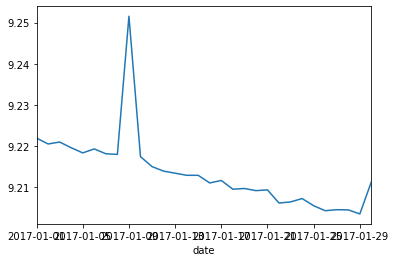

In [98]:
df_botptMean['diff'].plot()
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

In [ ]:
df_botptMean['daily_diff'] = df_botptMean['diff'] 

In [ ]:
import pickle


with open('/jovyan/data/botpt/2019bottom_pressure15s_E.pkl, 'rb') as f:
    botpt_E = pickle.load(f)

In [ ]:
botpt_E

In [ ]:
with open('2019bottom_pressure15s_F.pkl', 'rb') as f:
    botpt_F = pickle.load(f)

In [ ]:
botpt_F.iloc[1, 10]

In [ ]:
botpt_F[1, 10]